In [10]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score,accuracy_score,roc_auc_score
from sklearn.metrics import roc_curve, auc,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
import pylab as pl
import statsmodels
import statsmodels.api as sm

In [2]:
df = pd.read_csv('df_cleanedfinal.csv')
df.head()

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,metformin,repaglinide,glipizide,...,Diagnosis3_Digestive,Diagnosis3_Genitourinary,Diagnosis3_Injury,Diagnosis3_Musculoskeletal,Diagnosis3_Neoplasms,Diagnosis3_Others,Diagnosis3_Respiratory,insulin_treatment_insulin_only,insulin_treatment_no_med,insulin_treatment_other_meds
0,1,5,1.0,41,0.0,1.0,1,-2,-2,-2,...,0,0,0,0,0,1,0,0,1,0
1,1,15,3.0,59,0.0,18.0,9,-2,-2,-2,...,0,0,0,0,1,0,0,1,0,0
2,1,25,2.0,11,5.0,13.0,6,-2,-2,0,...,0,0,0,0,0,1,0,0,0,1
3,0,35,2.0,44,1.0,16.0,7,-2,-2,-2,...,0,0,0,0,0,0,0,1,0,0
4,0,45,1.0,51,0.0,8.0,5,-2,-2,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X = df.drop('readmitted',1) # independent variables
y = df['readmitted']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1)

In [5]:
sc=StandardScaler()
scaledXtrain = sc.fit(X_train) 
scaledXtrain = sc.transform(X_train)
scaledXtest = sc.transform(X_test)

### Base Models:

In [6]:
lr = LogisticRegression()
lr.fit(scaledXtrain,y_train)
y_train_pred = lr.predict(scaledXtrain)
y_test_pred = lr.predict(scaledXtest)
y_train_prob = lr.predict_proba(scaledXtrain)[:, 1]
y_test_prob = lr.predict_proba(scaledXtest)[:, 1]
print("Train Accuracy Score:", accuracy_score(y_train, y_train_pred))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred), '\n')
print("Train ClassificationReport :\n",classification_report(y_train, y_train_pred),'\n')
print("Train F1 Score:", f1_score(y_train, y_train_pred))
print("Train Precision Score:", precision_score(y_train, y_train_pred))
print("Train Recall Score:", recall_score(y_train, y_train_pred))
print("Train ROC_AUC Score:", roc_auc_score(y_train, y_train_prob))
print()
print("Test Accuracy Score:", accuracy_score(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred), '\n')
print("Test ClassificationReport :\n",classification_report(y_test, y_test_pred),'\n')
print("Test F1 Score:", f1_score(y_test, y_test_pred))
print("Test Precision Score:", precision_score(y_test, y_test_pred))
print("Test Recall Score:", recall_score(y_test, y_test_pred))
print("Test ROC_AUC Score:", roc_auc_score(y_test, y_test_prob))

Train Accuracy Score: 0.6242269079193395
Train Confusion Matrix:
 [[27553  9300]
 [16826 15847]] 

Train ClassificationReport :
               precision    recall  f1-score   support

           0       0.62      0.75      0.68     36853
           1       0.63      0.49      0.55     32673

    accuracy                           0.62     69526
   macro avg       0.63      0.62      0.61     69526
weighted avg       0.63      0.62      0.62     69526
 

Train F1 Score: 0.5481494292632307
Train Precision Score: 0.6301745735077743
Train Recall Score: 0.4850182107550577
Train ROC_AUC Score: 0.6667313337415541

Test Accuracy Score: 0.6227808168607578
Test Confusion Matrix:
 [[11713  3948]
 [ 7292  6844]] 

Test ClassificationReport :
               precision    recall  f1-score   support

           0       0.62      0.75      0.68     15661
           1       0.63      0.48      0.55     14136

    accuracy                           0.62     29797
   macro avg       0.63      0.62      0.

In [7]:
probas1_ = lr.fit(scaledXtrain, y_train).predict_proba(scaledXtest)
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas1_[:, 1])
roc_auc= auc(fpr1, tpr1)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.666635


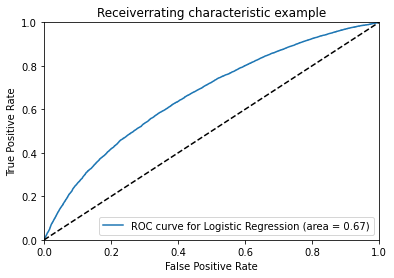

In [8]:
pl.clf()
pl.plot(fpr1, tpr1, label='ROC curve for Logistic Regression (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic example')
pl.legend(loc="lower right")
pl.show()

In [18]:
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.3)
logreg = sm.Logit(y_train, X_train).fit()
logreg.summary()

         Current function value: 0.649417
         Iterations: 35


C:\Users\umair\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             readmitted   No. Observations:                69526
Model:                          Logit   Df Residuals:                    69465
Method:                           MLE   Df Model:                           60
Date:                Tue, 22 Feb 2022   Pseudo R-squ.:                 0.06064
Time:                        19:32:06   Log-Likelihood:                -45151.
converged:                      False   LL-Null:                       -48066.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================================================================
                                                                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------
const                                                                   -0.8465   4.35e+05  -1.94e-06      1.000   -8.53e+05    8.53e+05
gender                                                                   0.0594      0.016      3.677      0.000       0.028       0.091
age                                                                      0.0029      0.001      4.810      0.000       0.002       0.004
time_in_hospital                                                         0.0250      0.004      6.908      0.000       0.018       0.032
num_lab_procedures                                                       0.0012      0.000      2.592      0.010       0.000       0.002
num_procedures                                                          -0.0527      0.006     -8.405      0.000      -0.065      -0.040
num_medications                                                          0.0059      0.002      3.836      0.000       0.003       0.009
number_diagnoses                                                         0.0736      0.005     14.895      0.000       0.064       0.083
metformin                                                               -0.0913      0.014     -6.575      0.000      -0.119      -0.064
repaglinide                                                              0.0520      0.032      1.609      0.108      -0.011       0.115
glipizide                                                                0.0169      0.014      1.239      0.215      -0.010       0.044
pioglitazone                                                             0.0135      0.017      0.780      0.435      -0.020       0.047
insulin                                                                 -0.0416      0.016     -2.523      0.012      -0.074      -0.009
change                                                                   0.0423      0.024      1.769      0.077      -0.005       0.089
diabetesMed                                                             -0.2786   4.35e+05   -6.4e-07      1.000   -8.53e+05    8.53e+05
total_visits                                                             0.3370      0.007     50.662      0.000       0.324       0.350
number_diab_meds                                                        -0.0214      0.025     -0.844      0.399      -0.071       0.028
race_Asian                                                              -0.3930      0.106     -3.692      0.000      -0.602      -0.184
race_Caucasian                                                           0.0106      0.021      0.505      0.613      -0.030       0.052
race_Hispanic                                                           -0.1373      0.059     -2.328      0.020      -0.253      -0.022
race_Other                                                              -0.2122      0.067

In [10]:
rf = RandomForestClassifier(random_state = 10, n_jobs = -1)
rf.fit(scaledXtrain,y_train)
y_train_pred = rf.predict(scaledXtrain)
y_test_pred = rf.predict(scaledXtest)
y_train_prob = rf.predict_proba(scaledXtrain)[:, 1]
y_test_prob = rf.predict_proba(scaledXtest)[:, 1]
print("Train Accuracy Score:", accuracy_score(y_train, y_train_pred))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred), '\n')
print("Train ClassificationReport :\n",classification_report(y_train, y_train_pred),'\n')
print("Train F1 Score:", f1_score(y_train, y_train_pred))
print("Train Precision Score:", precision_score(y_train, y_train_pred))
print("Train Recall Score:", recall_score(y_train, y_train_pred))
print("Train ROC_AUC Score:", roc_auc_score(y_train, y_train_prob))
print()
print("Test Accuracy Score:", accuracy_score(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred), '\n')
print("Test ClassificationReport :\n",classification_report(y_test, y_test_pred),'\n')
print("Test F1 Score:", f1_score(y_test, y_test_pred))
print("Test Precision Score:", precision_score(y_test, y_test_pred))
print("Test Recall Score:", recall_score(y_test, y_test_pred))
print("Test ROC_AUC Score:", roc_auc_score(y_test, y_test_prob))

Train Accuracy Score: 0.9999856168915225
Train Confusion Matrix:
 [[36852     1]
 [    0 32673]] 

Train ClassificationReport :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     36853
           1       1.00      1.00      1.00     32673

    accuracy                           1.00     69526
   macro avg       1.00      1.00      1.00     69526
weighted avg       1.00      1.00      1.00     69526
 

Train F1 Score: 0.9999846970786723
Train Precision Score: 0.9999693946256962
Train Recall Score: 1.0
Train ROC_AUC Score: 0.9999999995847515

Test Accuracy Score: 0.6243917172869752
Test Confusion Matrix:
 [[10911  4750]
 [ 6442  7694]] 

Test ClassificationReport :
               precision    recall  f1-score   support

           0       0.63      0.70      0.66     15661
           1       0.62      0.54      0.58     14136

    accuracy                           0.62     29797
   macro avg       0.62      0.62      0.62     29797
we

In [48]:
# base model with naive 
NB = GaussianNB()
NB.fit(scaledXtrain,y_train)
y_train_pred = NB.predict(scaledXtrain)
y_test_pred = NB.predict(scaledXtest)
y_train_prob = NB.predict_proba(scaledXtrain)[:, 1]
y_test_prob = NB.predict_proba(scaledXtest)[:, 1]
print("Train Accuracy Score:", accuracy_score(y_train, y_train_pred))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred), '\n')
print("Train ClassificationReport :\n",classification_report(y_train, y_train_pred),'\n')
print("Train F1 Score:", f1_score(y_train, y_train_pred))
print("Train Precision Score:", precision_score(y_train, y_train_pred))
print("Train Recall Score:", recall_score(y_train, y_train_pred))
print("Train ROC_AUC Score:", roc_auc_score(y_train, y_train_prob))
print()
print("Test Accuracy Score:", accuracy_score(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred), '\n')
print("Test ClassificationReport :\n",classification_report(y_test, y_test_pred),'\n')
print("Test F1 Score:", f1_score(y_test, y_test_pred))
print("Test Precision Score:", precision_score(y_test, y_test_pred))
print("Test Recall Score:", recall_score(y_test, y_test_pred))
print("Test ROC_AUC Score:", roc_auc_score(y_test, y_test_prob))

Train Accuracy Score: 0.5892184218853379
Train Confusion Matrix:
 [[21107 15746]
 [12814 19859]] 

Train ClassificationReport :
               precision    recall  f1-score   support

           0       0.62      0.57      0.60     36853
           1       0.56      0.61      0.58     32673

    accuracy                           0.59     69526
   macro avg       0.59      0.59      0.59     69526
weighted avg       0.59      0.59      0.59     69526
 

Train F1 Score: 0.5817100676645479
Train Precision Score: 0.5577587417497543
Train Recall Score: 0.6078107305726441
Train ROC_AUC Score: 0.617392258271282

Test Accuracy Score: 0.5817028559922139
Test Confusion Matrix:
 [[8892 6769]
 [5695 8441]] 

Test ClassificationReport :
               precision    recall  f1-score   support

           0       0.61      0.57      0.59     15661
           1       0.55      0.60      0.58     14136

    accuracy                           0.58     29797
   macro avg       0.58      0.58      0.58   

In [ ]:
# iterative model buliding with default parameters

In [94]:
models = []

models.append(('LR', Pipeline([("Transformer", PowerTransformer()),
                               ("Scaler", StandardScaler()),
                              ("LogReg", LogisticRegression(random_state = 0, solver = 'liblinear'))])))
models.append(('DT', DecisionTreeClassifier(random_state = 0)))
models.append(('RF', RandomForestClassifier(random_state = 0, n_jobs = -1)))
models.append(('KNN', Pipeline([("Transformer", PowerTransformer()),
                               ("Scaler", StandardScaler()),
                              ("KNN", KNeighborsClassifier(n_neighbors=5))])))
models.append(('ADB', AdaBoostClassifier(random_state = 0)))
models.append(('GB', GradientBoostingClassifier(random_state = 0)))
models.append(('XGB', XGBClassifier(random_state = 0)))
models.append(('LGB',LGBMClassifier(random_state = 0)))
models.append(('CB',CatBoostClassifier(iterations=5,learning_rate=0.1)))
models.append(('NB',GaussianNB()))

In [95]:
# validation scores for train
precision = []
recall = []
names = []
f1 = []
accuracy = []
roc_auc = []

for name, model in models: 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    y_proba = model.predict_proba(X_train)[:, 1]
    precision.append(precision_score(y_train, y_pred))
    recall.append(recall_score(y_train, y_pred))
    f1.append(f1_score(y_train, y_pred))
    accuracy.append(accuracy_score(y_train, y_pred))
    roc_auc.append(roc_auc_score(y_train, y_proba))
    names.append(name)

models_dfTRAIN = pd.DataFrame({'Model' : names, 'Precision_Train' : precision, 'Recall_Train' : recall,
                          'F1_Train' : f1, 'Accuracy_Train' : accuracy, 'ROC_AUC_Train' : roc_auc})
models_dfTRAIN

[15:56:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.6852775	total: 91.3ms	remaining: 365ms
1:	learn: 0.6788253	total: 112ms	remaining: 168ms
2:	learn: 0.6736136	total: 130ms	remaining: 86.7ms
3:	learn: 0.6691384	total: 143ms	remaining: 35.7ms
4:	learn: 0.6661295	total: 156ms	remaining: 0us


,Model,Precision_Train,Recall_Train,F1_Train,Accuracy_Train,ROC_AUC_Train
0,LR,0.616168,0.533529,0.571878,0.624601,0.666814
1,DT,1.000000,0.999969,0.999985,0.999986,1.000000
2,RF,1.000000,0.999969,0.999985,0.999986,1.000000
3,KNN,0.710050,0.681603,0.695535,0.719573,0.789068
4,ADB,0.623657,0.515257,0.564299,0.626082,0.669526
5,GB,0.630141,0.528908,0.575104,0.632727,0.681864
6,XGB,0.700399,0.650751,0.674663,0.705060,0.780840
7,LGB,0.653106,0.577847,0.613176,0.657380,0.717750
8,CB,0.615845,0.529122,0.569199,0.623608,0.664370
9,NB,0.557727,0.607811,0.581693,0.589190,0.617393


In [96]:
## Validation Set Scores for test
precision = []
recall = []
names = []
f1 = []
accuracy = []
roc_auc = []

for name, model in models: 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))
    accuracy.append(accuracy_score(y_test, y_pred))
    roc_auc.append(roc_auc_score(y_test, y_proba))
    names.append(name)
models_dfTEST = pd.DataFrame({'Model_Test' : names, 'Precision_Test' : precision, 'Recall_Test' : recall,
                          'F1_Test' : f1, 'Accuracy_Test' : accuracy, 'ROC_AUC_Test' : roc_auc})
models_dfTEST

[15:58:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.6852775	total: 12.5ms	remaining: 50ms
1:	learn: 0.6788253	total: 22.6ms	remaining: 33.9ms
2:	learn: 0.6736136	total: 33ms	remaining: 22ms
3:	learn: 0.6691384	total: 42.5ms	remaining: 10.6ms
4:	learn: 0.6661295	total: 55.1ms	remaining: 0us


,Model_Test,Precision_Test,Recall_Test,F1_Test,Accuracy_Test,ROC_AUC_Test
0,LR,0.622083,0.535654,0.575642,0.625331,0.665916
1,DT,0.528666,0.527731,0.528198,0.552740,0.551523
2,RF,0.617847,0.539261,0.575886,0.623184,0.667138
3,KNN,0.541289,0.510540,0.525465,0.562540,0.585155
4,ADB,0.627613,0.516129,0.566438,0.625164,0.667981
5,GB,0.629873,0.528014,0.574463,0.628889,0.675674
6,XGB,0.616733,0.569963,0.592426,0.627949,0.674233
7,LGB,0.627271,0.554542,0.588668,0.632346,0.679567
8,CB,0.618597,0.527094,0.569191,0.621472,0.663969
9,NB,0.554927,0.597128,0.575255,0.581669,0.609713


### With Class Weights


In [98]:
models = []

models.append(('LR', Pipeline([("Transformer", PowerTransformer()),
                               ("Scaler", StandardScaler()),
                              ("LogReg", LogisticRegression(random_state = 0, solver = 'liblinear',class_weight='balanced'))])))
models.append(('DT', DecisionTreeClassifier(random_state = 0,class_weight='balanced')))
models.append(('RF', RandomForestClassifier(random_state = 0, n_jobs = -1,class_weight ='balanced_subsample')))
models.append(('KNN', Pipeline([("Transformer", PowerTransformer()),
                               ("Scaler", StandardScaler()),
                              ("KNN", KNeighborsClassifier(n_neighbors=5))])))
models.append(('ADB', AdaBoostClassifier(random_state = 0)))
models.append(('GB', GradientBoostingClassifier(random_state = 0)))
models.append(('XGB', XGBClassifier(random_state = 0,scale_pos_weight=7.72)))
models.append(('LGB',LGBMClassifier(random_state = 0,class_weight ='balanced')))
models.append(('CB',CatBoostClassifier(iterations=5,learning_rate=0.1)))
models.append(('NB',GaussianNB()))

In [99]:
# validation scores for train
precision = []
recall = []
names = []
f1 = []
accuracy = []
roc_auc = []

for name, model in models: 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    y_proba = model.predict_proba(X_train)[:, 1]
    precision.append(precision_score(y_train, y_pred))
    recall.append(recall_score(y_train, y_pred))
    f1.append(f1_score(y_train, y_pred))
    accuracy.append(accuracy_score(y_train, y_pred))
    roc_auc.append(roc_auc_score(y_train, y_proba))
    names.append(name)

models_dfTRAIN = pd.DataFrame({'Model' : names, 'Precision_Train' : precision, 'Recall_Train' : recall,
                          'F1_Train' : f1, 'Accuracy_Train' : accuracy, 'ROC_AUC_Train' : roc_auc})
models_dfTRAIN

[16:06:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.6852775	total: 12.8ms	remaining: 51.3ms
1:	learn: 0.6788253	total: 23ms	remaining: 34.5ms
2:	learn: 0.6736136	total: 33.6ms	remaining: 22.4ms
3:	learn: 0.6691384	total: 44ms	remaining: 11ms
4:	learn: 0.6661295	total: 56.7ms	remaining: 0us


,Model,Precision_Train,Recall_Train,F1_Train,Accuracy_Train,ROC_AUC_Train
0,LR,0.601981,0.589508,0.595680,0.623925,0.666826
1,DT,0.999969,1.000000,0.999985,0.999986,1.000000
2,RF,1.000000,0.999969,0.999985,0.999986,1.000000
3,KNN,0.710050,0.681603,0.695535,0.719573,0.789068
4,ADB,0.623657,0.515257,0.564299,0.626082,0.669526
5,GB,0.630141,0.528908,0.575104,0.632727,0.681864
6,XGB,0.494759,0.999633,0.661911,0.520108,0.782944
7,LGB,0.630507,0.657852,0.643890,0.658042,0.717055
8,CB,0.615845,0.529122,0.569199,0.623608,0.664370
9,NB,0.557727,0.607811,0.581693,0.589190,0.617393


In [100]:
## Validation Set Scores for test
precision = []
recall = []
names = []
f1 = []
accuracy = []
roc_auc = []

for name, model in models: 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))
    accuracy.append(accuracy_score(y_test, y_pred))
    roc_auc.append(roc_auc_score(y_test, y_proba))
    names.append(name)
models_dfTEST = pd.DataFrame({'Model_Test' : names, 'Precision_Test' : precision, 'Recall_Test' : recall,
                          'F1_Test' : f1, 'Accuracy_Test' : accuracy, 'ROC_AUC_Test' : roc_auc})
models_dfTEST

[16:09:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.6852775	total: 12.4ms	remaining: 49.7ms
1:	learn: 0.6788253	total: 22.2ms	remaining: 33.2ms
2:	learn: 0.6736136	total: 33.8ms	remaining: 22.5ms
3:	learn: 0.6691384	total: 44.9ms	remaining: 11.2ms
4:	learn: 0.6661295	total: 56.8ms	remaining: 0us


,Model_Test,Precision_Test,Recall_Test,F1_Test,Accuracy_Test,ROC_AUC_Test
0,LR,0.606718,0.591610,0.599069,0.624325,0.665933
1,DT,0.528352,0.535229,0.531768,0.552841,0.551983
2,RF,0.620073,0.539757,0.577134,0.624761,0.666465
3,KNN,0.541289,0.510540,0.525465,0.562540,0.585155
4,ADB,0.627613,0.516129,0.566438,0.625164,0.667981
5,GB,0.629873,0.528014,0.574463,0.628889,0.675674
6,XGB,0.485057,0.980546,0.649045,0.496929,0.671944
7,LGB,0.602842,0.627193,0.614777,0.627110,0.680284
8,CB,0.618597,0.527094,0.569191,0.621472,0.663969
9,NB,0.554927,0.597128,0.575255,0.581669,0.609713


In [22]:
##cross validation

In [104]:
clf1= LogisticRegression(max_iter=3000)
clf2= DecisionTreeClassifier(random_state=0)
clf3= RandomForestClassifier(random_state=0)
clf4= KNeighborsClassifier(n_neighbors=5) 
clf5= AdaBoostClassifier(random_state = 0)
clf6= GradientBoostingClassifier(random_state = 0)
clf7= XGBClassifier(random_state=0,verbosity=0)
clf8= LGBMClassifier(random_state = 0)
clf9= CatBoostClassifier(iterations=5,learning_rate=0.1)
clf10=GaussianNB()

In [105]:
kf=KFold(n_splits=5,shuffle=True,random_state=0)
for i,j in zip([clf1,clf2,clf3,clf4,clf5,clf6,clf7,clf8,clf9,clf10],['LR','DT','RF','KNN','ABC','GB','XGB','LGB','CB','NB']):
    score = cross_val_score(i, X, y, cv=kf, scoring='recall')
    print(j,np.mean(score),np.std(score)/np.mean(score))

LR 0.48586600144721126 0.011210965450934316
DT 0.5300730186656354 0.005670123978960646
RF 0.542618579628549 0.010130299436272118
KNN 0.5063588003426329 0.013670693113857433
ABC 0.5158150243883484 0.01108192412116669
GB 0.5227957424500789 0.007692601594020774
XGB 0.5610553105131884 0.008048280092972959
LGB 0.5471277241142023 0.011729415569092766
0:	learn: 0.6852353	total: 25.3ms	remaining: 101ms
1:	learn: 0.6786400	total: 38.4ms	remaining: 57.6ms
2:	learn: 0.6735885	total: 53ms	remaining: 35.4ms
3:	learn: 0.6692451	total: 67.8ms	remaining: 16.9ms
4:	learn: 0.6658156	total: 80.9ms	remaining: 0us
0:	learn: 0.6853885	total: 15.8ms	remaining: 63ms
1:	learn: 0.6789423	total: 29.5ms	remaining: 44.3ms
2:	learn: 0.6740831	total: 41ms	remaining: 27.3ms
3:	learn: 0.6700537	total: 53.4ms	remaining: 13.4ms
4:	learn: 0.6664339	total: 76.7ms	remaining: 0us
0:	learn: 0.6851946	total: 24.3ms	remaining: 97ms
1:	learn: 0.6789229	total: 35.9ms	remaining: 53.8ms
2:	learn: 0.6735441	total: 48.7ms	remaining:

### Tuning Hyperparameters

In [26]:
#RF
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [90, 100, 150, 200],
                     'max_depth': [10, 15, 20],
                     'min_samples_split': [2, 5, 8]}]
random_forest_classification = RandomForestClassifier(random_state = 10)
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5,scoring='recall')

# use fit() to fit the model on the train set
rf_model = rf_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest Classifier: ', rf_model.best_params_, '\n')

Best parameters for random forest Classifier:  {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 90} 



In [27]:
random_forest_tuned_model = RandomForestClassifier(criterion = rf_model.best_params_['criterion'], 
                                                   max_depth = rf_model.best_params_['max_depth'], 
                                                   min_samples_split = rf_model.best_params_['min_samples_split'], 
                                                   n_estimators = rf_model.best_params_['n_estimators'],
                                                   random_state = 10)
scores = cross_val_score(estimator = random_forest_tuned_model, 
                         X = X_train, 
                         y = y_train, 
                         cv = 5, 
                         scoring = 'recall')
print("Mean Recall score after 5 fold cross validation: ", round(scores.mean(), 2))

Mean Recall score after 5 fold cross validation:  0.55


In [28]:
rf_model.best_score_

0.5463532264519954

In [29]:
#XGB

In [30]:
tuned_paramaters = [{'n_estimators': [100, 120, 150],
                     'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015], 
                     'gamma': [2, 3, 4, 5, 6],
                     'max_depth': [2, 3, 4, 5, 6]}]
 

xgb_model_classifier = XGBClassifier(random_state = 8, n_jobs=-1)

xgb_grid = GridSearchCV(estimator = xgb_model_classifier, 
                         param_grid = tuned_paramaters, 
                         cv = 5, 
                         n_jobs=-1)

# fit the model on X_train and y_train using fit()
xgb_model=xgb_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Extreme Gradient Boositng Classifier: ', xgb_model.best_params_, '\n')


Best parameters for Extreme Gradient Boositng Classifier:  {'gamma': 4, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 120} 



In [31]:
xgb_model.best_score_

0.6327418114733782

In [50]:
XGB_tuned_model = XGBClassifier( n_estimators = xgb_model.best_params_['n_estimators'],
                                          learning_rate = xgb_model.best_params_['learning_rate'],
                                          gamma = xgb_model.best_params_['gamma'],
                                          max_depth = xgb_model.best_params_['max_depth'],
                                          random_state = 10)
scores = cross_val_score(estimator = XGB_tuned_model, 
                         X = X_train, 
                         y = y_train, 
                         cv = 5, 
                         scoring = 'recall')
print("Mean Recall score after 5 fold cross validation: ", round(scores.mean(), 2))

Mean Recall score after 5 fold cross validation:  0.55


In [ ]:
#LGB

gridParams = {
'learning_rate': [0.001,0.01],
'n_estimators': [ 1000],
'num_leaves': [12, 30,80],
'boosting_type' : ['gbdt'],
'objective' : ['binary'],
'random_state' : [1], # Updated from 'seed'
'colsample_bytree' : [ 0.8, 1],
'subsample' : [0.5,0.7,0.75],
'reg_alpha' : [0.1, 1.2],
'reg_lambda' : [0.1, 1.2],
'subsample_freq' : [500,1000],
'max_depth' : [15, 30, 80]

In [45]:
tuned_paramaters = [{'n_estimators': [100, 120, 150],
                     'learning_rate': [0.001, 0.01, 0.1],
                     'max_depth': [2, 3, 4, 5, 6]}]
 
lgb_model_classifier = LGBMClassifier(random_state = 8, n_jobs=-1)

lgb_grid = GridSearchCV(estimator = lgb_model_classifier, 
                         param_grid = tuned_paramaters, 
                         cv = 5, 
                         n_jobs=-1)

# fit the model on X_train and y_train using fit()
lgb_model=lgb_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Light Gradient Boositng Classifier: ', lgb_model.best_params_, '\n')

Best parameters for Light Gradient Boositng Classifier:  {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 120} 



In [47]:
lgb_model.best_score_

0.6318356708806595

In [52]:
LGB_tuned_model = LGBMClassifier(n_estimators = lgb_model.best_params_['n_estimators'],
                                          learning_rate = lgb_model.best_params_['learning_rate'],
                                          max_depth = lgb_model.best_params_['max_depth'],
                                          random_state = 10)
scores = cross_val_score(estimator = LGB_tuned_model, 
                         X = X_train, 
                         y = y_train, 
                         cv = 5, 
                         scoring = 'recall')
print("Mean Recall score after 5 fold cross validation: ", round(scores.mean(), 2))

Mean Recall score after 5 fold cross validation:  0.55


In [ ]:
#Rf with randomized scearch cv

In [44]:
param = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [90, 100, 150, 200,250,300,350,400],
                     'max_depth': [10, 15, 20,25,30,50,60],
                     'min_samples_split': [2,5,7,10]}]
random_forest_classification1 = RandomForestClassifier(random_state = 10)
rf_grid = RandomizedSearchCV(estimator = random_forest_classification1,param_distributions=param,cv = 5,scoring='recall')

# use fit() to fit the model on the train set
rf_model1 = rf_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest Classifier RCV: ', rf_model1.best_params_, '\n')

Best parameters for random forest Classifier RCV:  {'n_estimators': 90, 'min_samples_split': 7, 'max_depth': 30, 'criterion': 'gini'} 



In [46]:
random_forest_tuned_model1 = RandomForestClassifier(criterion = rf_model1.best_params_['criterion'], 
                                                   max_depth = rf_model1.best_params_['max_depth'], 
                                                   min_samples_split = rf_model1.best_params_['min_samples_split'], 
                                                   n_estimators = rf_model1.best_params_['n_estimators'],
                                                   random_state = 10)
scores = cross_val_score(estimator = random_forest_tuned_model1, 
                         X = X_train, 
                         y = y_train, 
                         cv = 5, 
                         scoring = 'recall')
print("Mean Recall score after 5 fold cross validation: ", round(scores.mean(), 2))

Mean Recall score after 5 fold cross validation:  0.55


In [ ]:
#NB

In [50]:
param = {'var_smoothing': np.logspace(0,-9, num=100)}
nb_classifier = GaussianNB()
nb_grid = RandomizedSearchCV(estimator = nb_classifier,param_distributions=param,cv = 5,scoring='recall')

# use fit() to fit the model on the train set
nb_model = nb_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest Classifier RCV: ', nb_model.best_params_, '\n')

Best parameters for random forest Classifier RCV:  {'var_smoothing': 8.111308307896873e-06} 



In [55]:
nb_model1 = GaussianNB(var_smoothing = nb_model.best_params_['var_smoothing'])
scores = cross_val_score(estimator = nb_model1, 
                         X = X_train, 
                         y = y_train, 
                         cv = 5, 
                         scoring = 'recall')
print("Mean Recall score after 5 fold cross validation: ", round(scores.mean(), 2))

Mean Recall score after 5 fold cross validation:  0.62


In [ ]:
# models with tuned hyperparameters.

In [11]:
#RF with tuned parameters
rf = RandomForestClassifier(criterion='gini',max_depth=20,min_samples_split=2,n_estimators=90,random_state = 10, n_jobs = -1)
rf.fit(scaledXtrain,y_train)
y_train_pred = rf.predict(scaledXtrain)
y_test_pred = rf.predict(scaledXtest)
y_train_prob = rf.predict_proba(scaledXtrain)[:, 1]
y_test_prob = rf.predict_proba(scaledXtest)[:, 1]
print("Train Accuracy Score:", accuracy_score(y_train, y_train_pred))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred), '\n')
print("Train ClassificationReport :\n",classification_report(y_train, y_train_pred),'\n')
print("Train F1 Score:", f1_score(y_train, y_train_pred))
print("Train Precision Score:", precision_score(y_train, y_train_pred))
print("Train Recall Score:", recall_score(y_train, y_train_pred))
print("Train ROC_AUC Score:", roc_auc_score(y_train, y_train_prob))
print()
print("Test Accuracy Score:", accuracy_score(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred), '\n')
print("Test ClassificationReport :\n",classification_report(y_test, y_test_pred),'\n')
print("Test F1 Score:", f1_score(y_test, y_test_pred))
print("Test Precision Score:", precision_score(y_test, y_test_pred))
print("Test Recall Score:", recall_score(y_test, y_test_pred))
print("Test ROC_AUC Score:", roc_auc_score(y_test, y_test_prob))

Train Accuracy Score: 0.9120616747691511
Train Confusion Matrix:
 [[34237  2616]
 [ 3498 29175]] 

Train ClassificationReport :
               precision    recall  f1-score   support

           0       0.91      0.93      0.92     36853
           1       0.92      0.89      0.91     32673

    accuracy                           0.91     69526
   macro avg       0.91      0.91      0.91     69526
weighted avg       0.91      0.91      0.91     69526
 

Train F1 Score: 0.905156366344006
Train Precision Score: 0.9177125601585354
Train Recall Score: 0.8929391240473785
Train ROC_AUC Score: 0.9748873316231521

Test Accuracy Score: 0.6278148806926872
Test Confusion Matrix:
 [[10972  4689]
 [ 6401  7735]] 

Test ClassificationReport :
               precision    recall  f1-score   support

           0       0.63      0.70      0.66     15661
           1       0.62      0.55      0.58     14136

    accuracy                           0.63     29797
   macro avg       0.63      0.62      0.6

In [13]:
#XGB with tuned parameters
xgb = XGBClassifier(gamma=4,learning_rate=0.1,max_depth=6,n_estimators=120,random_state = 10, n_jobs = -1)
xgb.fit(scaledXtrain,y_train)
y_train_pred = xgb.predict(scaledXtrain)
y_test_pred = xgb.predict(scaledXtest)
y_train_prob = xgb.predict_proba(scaledXtrain)[:, 1]
y_test_prob = xgb.predict_proba(scaledXtest)[:, 1]
print("Train Accuracy Score:", accuracy_score(y_train, y_train_pred))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred), '\n')
print("Train ClassificationReport :\n",classification_report(y_train, y_train_pred),'\n')
print("Train F1 Score:", f1_score(y_train, y_train_pred))
print("Train Precision Score:", precision_score(y_train, y_train_pred))
print("Train Recall Score:", recall_score(y_train, y_train_pred))
print("Train ROC_AUC Score:", roc_auc_score(y_train, y_train_prob))
print()
print("Test Accuracy Score:", accuracy_score(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred), '\n')
print("Test ClassificationReport :\n",classification_report(y_test, y_test_pred),'\n')
print("Test F1 Score:", f1_score(y_test, y_test_pred))
print("Test Precision Score:", precision_score(y_test, y_test_pred))
print("Test Recall Score:", recall_score(y_test, y_test_pred))
print("Test ROC_AUC Score:", roc_auc_score(y_test, y_test_prob))

[09:48:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Accuracy Score: 0.6646002934154129
Train Confusion Matrix:
 [[26988  9865]
 [13454 19219]] 

Train ClassificationReport :
               precision    recall  f1-score   support

           0       0.67      0.73      0.70     36853
           1       0.66      0.59      0.62     32673

    accuracy                           0.66     69526
   macro avg       0.66      0.66      0.66     69526
weighted avg       0.66      0.66      0.66     69526
 

Train F1 Score: 0.6224071765144031
Train Precision Score: 0.6608100673910053
Train Recall Score: 0.5882226915189912
Train ROC_AUC Score: 0.7275968723441246

Test Accuracy Score: 0.6309695606940297
Test Confusion Matrix:
 [[10946  47

In [14]:
#LGB with tuned parameters
lgb = LGBMClassifier(learning_rate=0.1,max_depth=6,n_estimators=120,random_state = 10, n_jobs = -1)
lgb.fit(scaledXtrain,y_train)
y_train_pred = lgb.predict(scaledXtrain)
y_test_pred = lgb.predict(scaledXtest)
y_train_prob = lgb.predict_proba(scaledXtrain)[:, 1]
y_test_prob = lgb.predict_proba(scaledXtest)[:, 1]
print("Train Accuracy Score:", accuracy_score(y_train, y_train_pred))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred), '\n')
print("Train ClassificationReport :\n",classification_report(y_train, y_train_pred),'\n')
print("Train F1 Score:", f1_score(y_train, y_train_pred))
print("Train Precision Score:", precision_score(y_train, y_train_pred))
print("Train Recall Score:", recall_score(y_train, y_train_pred))
print("Train ROC_AUC Score:", roc_auc_score(y_train, y_train_prob))
print()
print("Test Accuracy Score:", accuracy_score(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred), '\n')
print("Test ClassificationReport :\n",classification_report(y_test, y_test_pred),'\n')
print("Test F1 Score:", f1_score(y_test, y_test_pred))
print("Test Precision Score:", precision_score(y_test, y_test_pred))
print("Test Recall Score:", recall_score(y_test, y_test_pred))
print("Test ROC_AUC Score:", roc_auc_score(y_test, y_test_prob))

Train Accuracy Score: 0.6593216926042056
Train Confusion Matrix:
 [[26840 10013]
 [13673 19000]] 

Train ClassificationReport :
               precision    recall  f1-score   support

           0       0.66      0.73      0.69     36853
           1       0.65      0.58      0.62     32673

    accuracy                           0.66     69526
   macro avg       0.66      0.65      0.65     69526
weighted avg       0.66      0.66      0.66     69526
 

Train F1 Score: 0.6160230846545407
Train Precision Score: 0.6548788474132285
Train Recall Score: 0.5815199094053194
Train ROC_AUC Score: 0.7196846683922387

Test Accuracy Score: 0.6315065275027687
Test Confusion Matrix:
 [[10955  4706]
 [ 6274  7862]] 

Test ClassificationReport :
               precision    recall  f1-score   support

           0       0.64      0.70      0.67     15661
           1       0.63      0.56      0.59     14136

    accuracy                           0.63     29797
   macro avg       0.63      0.63      0.

In [77]:
#tuned with naive bayes
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB(var_smoothing=8.111308307896873e-06)
NB.fit(scaledXtrain,y_train)
y_train_pred = NB.predict(scaledXtrain)
y_test_pred = NB.predict(scaledXtest)
y_train_prob = NB.predict_proba(scaledXtrain)[:, 1]
y_test_prob = NB.predict_proba(scaledXtest)[:, 1]
print("Train Accuracy Score:", accuracy_score(y_train, y_train_pred))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred), '\n')
print("Train ClassificationReport :\n",classification_report(y_train, y_train_pred),'\n')
print("Train F1 Score:", f1_score(y_train, y_train_pred))
print("Train Precision Score:", precision_score(y_train, y_train_pred))
print("Train Recall Score:", recall_score(y_train, y_train_pred))
print("Train ROC_AUC Score:", roc_auc_score(y_train, y_train_prob))
print()
print("Test Accuracy Score:", accuracy_score(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred), '\n')
print("Test ClassificationReport :\n",classification_report(y_test, y_test_pred),'\n')
print("Test F1 Score:", f1_score(y_test, y_test_pred))
print("Test Precision Score:", precision_score(y_test, y_test_pred))
print("Test Recall Score:", recall_score(y_test, y_test_pred))
print("Test ROC_AUC Score:", roc_auc_score(y_test, y_test_prob))

Train Accuracy Score: 0.5892184218853379
Train Confusion Matrix:
 [[21107 15746]
 [12814 19859]] 

Train ClassificationReport :
               precision    recall  f1-score   support

           0       0.62      0.57      0.60     36853
           1       0.56      0.61      0.58     32673

    accuracy                           0.59     69526
   macro avg       0.59      0.59      0.59     69526
weighted avg       0.59      0.59      0.59     69526
 

Train F1 Score: 0.5817100676645479
Train Precision Score: 0.5577587417497543
Train Recall Score: 0.6078107305726441
Train ROC_AUC Score: 0.6173923695578986

Test Accuracy Score: 0.5817028559922139
Test Confusion Matrix:
 [[8892 6769]
 [5695 8441]] 

Test ClassificationReport :
               precision    recall  f1-score   support

           0       0.61      0.57      0.59     15661
           1       0.55      0.60      0.58     14136

    accuracy                           0.58     29797
   macro avg       0.58      0.58      0.58  

In [ ]:
# feature selection 

In [15]:
imp = pd.DataFrame(rf.feature_importances_,index=X_train.columns,columns=['Importance'])
imp.sort_values(by='Importance',ascending=False)

,Importance
total_visits,0.115501
num_lab_procedures,0.098951
num_medications,0.087716
time_in_hospital,0.060966
age,0.055950
...,...
insulin_treatment_no_med,0.003336
max_glu_serum_300,0.003066
discharge_disposition_id_Left AMA,0.002073
race_Asian,0.001951


In [16]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 9))
sel.fit(X_train, y_train)
selected_feat= X_train.columns[(sel.get_support())]

In [21]:
print(selected_feat)

Index(['gender', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_diagnoses', 'insulin',
       'total_visits', 'number_diab_meds', 'race_Caucasian',
       'admission_source_id_Referral'],
      dtype='object')


In [22]:
X_train[selected_feat]

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,insulin,total_visits,number_diab_meds,race_Caucasian,admission_source_id_Referral
87401,1,65,8.0,73,3.0,26.0,9,0,0.0,2,0,0
26984,0,75,8.0,57,1.0,13.0,9,-2,2.0,1,1,0
94383,0,65,1.0,11,0.0,8.0,8,0,0.0,1,1,0
67877,0,45,5.0,65,1.0,14.0,9,1,3.0,1,0,0
50646,1,35,2.0,71,0.0,4.0,3,-2,1.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
50057,0,65,5.0,55,0.0,7.0,8,-2,1.0,0,1,0
98047,0,65,1.0,45,0.0,7.0,8,-2,2.0,2,0,0
5192,1,55,2.0,40,0.0,11.0,4,-2,0.0,2,1,0
77708,1,65,1.0,34,2.0,17.0,9,-1,0.0,1,0,0


In [23]:
rf = RandomForestClassifier(criterion='gini',max_depth=20,min_samples_split=2,n_estimators=90,random_state = 10, n_jobs = -1)
rf.fit(X_train[selected_feat],y_train)
y_train_pred = rf.predict(X_train[selected_feat])
y_test_pred = rf.predict(X_test[selected_feat])
y_train_prob = rf.predict_proba(X_train[selected_feat])[:, 1]
y_test_prob = rf.predict_proba(X_test[selected_feat])[:, 1]
print("Train Accuracy Score:", accuracy_score(y_train, y_train_pred))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred), '\n')
print("Train ClassificationReport :\n",classification_report(y_train, y_train_pred),'\n')
print("Train F1 Score:", f1_score(y_train, y_train_pred))
print("Train Precision Score:", precision_score(y_train, y_train_pred))
print("Train Recall Score:", recall_score(y_train, y_train_pred))
print("Train ROC_AUC Score:", roc_auc_score(y_train, y_train_prob))
print()
print("Test Accuracy Score:", accuracy_score(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred), '\n')
print("Test ClassificationReport :\n",classification_report(y_test, y_test_pred),'\n')
print("Test F1 Score:", f1_score(y_test, y_test_pred))
print("Test Precision Score:", precision_score(y_test, y_test_pred))
print("Test Recall Score:", recall_score(y_test, y_test_pred))
print("Test ROC_AUC Score:", roc_auc_score(y_test, y_test_prob))

Train Accuracy Score: 0.9794177717688347
Train Confusion Matrix:
 [[35919   934]
 [  497 32176]] 

Train ClassificationReport :
               precision    recall  f1-score   support

           0       0.99      0.97      0.98     36853
           1       0.97      0.98      0.98     32673

    accuracy                           0.98     69526
   macro avg       0.98      0.98      0.98     69526
weighted avg       0.98      0.98      0.98     69526
 

Train F1 Score: 0.9782466594712919
Train Precision Score: 0.9717909996979764
Train Recall Score: 0.9847886634223977
Train ROC_AUC Score: 0.9981175515862406

Test Accuracy Score: 0.6111017887706817
Test Confusion Matrix:
 [[10460  5201]
 [ 6387  7749]] 

Test ClassificationReport :
               precision    recall  f1-score   support

           0       0.62      0.67      0.64     15661
           1       0.60      0.55      0.57     14136

    accuracy                           0.61     29797
   macro avg       0.61      0.61      0.

In [25]:
sel = SelectFromModel(XGBClassifier(n_estimators = 120))
sel.fit(X_train, y_train)
selected_feat1= X_train.columns[(sel.get_support())]
selected_feat1


[10:06:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Index(['age', 'number_diagnoses', 'metformin', 'diabetesMed', 'total_visits',
       'discharge_disposition_id_Not Available',
       'discharge_disposition_id_Transferred to another medical facility',
       'admission_source_id_Not Available', 'admission_source_id_Referral',
       'admission_source_id_Transferred from another health care facility',
       'max_glu_serum_200', 'A1Cresult_5', 'Diagnosis2_Others',
       'Diagnosis1_Diabetes'],
      dtype='object')

In [26]:
xgb = XGBClassifier(gamma=4,learning_rate=0.1,max_depth=6,n_estimators=120,random_state = 10, n_jobs = -1)
xgb.fit(X_train[selected_feat1],y_train)
y_train_pred = xgb.predict(X_train[selected_feat1])
y_test_pred = xgb.predict(X_test[selected_feat1])
y_train_prob = xgb.predict_proba(X_train[selected_feat1])[:, 1]
y_test_prob = xgb.predict_proba(X_test[selected_feat1])[:, 1]
print("Train Accuracy Score:", accuracy_score(y_train, y_train_pred))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred), '\n')
print("Train ClassificationReport :\n",classification_report(y_train, y_train_pred),'\n')
print("Train F1 Score:", f1_score(y_train, y_train_pred))
print("Train Precision Score:", precision_score(y_train, y_train_pred))
print("Train Recall Score:", recall_score(y_train, y_train_pred))
print("Train ROC_AUC Score:", roc_auc_score(y_train, y_train_prob))
print()
print("Test Accuracy Score:", accuracy_score(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred), '\n')
print("Test ClassificationReport :\n",classification_report(y_test, y_test_pred),'\n')
print("Test F1 Score:", f1_score(y_test, y_test_pred))
print("Test Precision Score:", precision_score(y_test, y_test_pred))
print("Test Recall Score:", recall_score(y_test, y_test_pred))
print("Test ROC_AUC Score:", roc_auc_score(y_test, y_test_prob))

[10:07:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Accuracy Score: 0.6307424560596036
Train Confusion Matrix:
 [[27149  9704]
 [15969 16704]] 

Train ClassificationReport :
               precision    recall  f1-score   support

           0       0.63      0.74      0.68     36853
           1       0.63      0.51      0.57     32673

    accuracy                           0.63     69526
   macro avg       0.63      0.62      0.62     69526
weighted avg       0.63      0.63      0.63     69526
 

Train F1 Score: 0.5654609773023476
Train Precision Score: 0.6325355952741594
Train Recall Score: 0.5112478193003397
Train ROC_AUC Score: 0.6776713492096798

Test Accuracy Score: 0.6243917172869752
Test Confusion Matrix:
 [[11456  42

In [27]:
sel = SelectFromModel(LGBMClassifier(n_estimators = 120))
sel.fit(X_train, y_train)
selected_feat2= X_train.columns[(sel.get_support())]
selected_feat2

Index(['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_diagnoses', 'metformin', 'insulin',
       'total_visits',
       'discharge_disposition_id_Transferred to another medical facility',
       'admission_source_id_Transferred from another health care facility',
       'Diagnosis1_Diabetes'],
      dtype='object')

In [28]:
lgb = LGBMClassifier(learning_rate=0.1,max_depth=6,n_estimators=120,random_state = 10, n_jobs = -1)
lgb.fit(X_train[selected_feat2],y_train)
y_train_pred = lgb.predict(X_train[selected_feat2])
y_test_pred = lgb.predict(X_test[selected_feat2])
y_train_prob = lgb.predict_proba(X_train[selected_feat2])[:, 1]
y_test_prob = lgb.predict_proba(X_test[selected_feat2])[:, 1]
print("Train Accuracy Score:", accuracy_score(y_train, y_train_pred))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred), '\n')
print("Train ClassificationReport :\n",classification_report(y_train, y_train_pred),'\n')
print("Train F1 Score:", f1_score(y_train, y_train_pred))
print("Train Precision Score:", precision_score(y_train, y_train_pred))
print("Train Recall Score:", recall_score(y_train, y_train_pred))
print("Train ROC_AUC Score:", roc_auc_score(y_train, y_train_prob))
print()
print("Test Accuracy Score:", accuracy_score(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred), '\n')
print("Test ClassificationReport :\n",classification_report(y_test, y_test_pred),'\n')
print("Test F1 Score:", f1_score(y_test, y_test_pred))
print("Test Precision Score:", precision_score(y_test, y_test_pred))
print("Test Recall Score:", recall_score(y_test, y_test_pred))
print("Test ROC_AUC Score:", roc_auc_score(y_test, y_test_prob))

Train Accuracy Score: 0.6473261801340505
Train Confusion Matrix:
 [[26950  9903]
 [14617 18056]] 

Train ClassificationReport :
               precision    recall  f1-score   support

           0       0.65      0.73      0.69     36853
           1       0.65      0.55      0.60     32673

    accuracy                           0.65     69526
   macro avg       0.65      0.64      0.64     69526
weighted avg       0.65      0.65      0.64     69526
 

Train F1 Score: 0.5955930861591238
Train Precision Score: 0.6458027826460174
Train Recall Score: 0.5526275518011814
Train ROC_AUC Score: 0.7025380450967238

Test Accuracy Score: 0.6267409470752089
Test Confusion Matrix:
 [[11153  4508]
 [ 6614  7522]] 

Test ClassificationReport :
               precision    recall  f1-score   support

           0       0.63      0.71      0.67     15661
           1       0.63      0.53      0.57     14136

    accuracy                           0.63     29797
   macro avg       0.63      0.62      0.

In [ ]:
# RFE

In [31]:
rf = RandomForestClassifier(criterion='gini',max_depth=20,min_samples_split=2,n_estimators=90,random_state = 10, n_jobs = -1)
rfe_rf = RFE(estimator =rf,n_features_to_select=10 )
rfe_model = rfe_rf.fit(X_train,y_train)
rfe_model.ranking_

X_train.columns
rfe_rank= pd.DataFrame()
rfe_rank['Rank'] = rfe_model.ranking_
rfe_rank['Feature']=X_train.columns
rfe_rank 

features_rfe1 = rfe_rank[rfe_rank['Rank']==1]['Feature']
features_rfe1

0                 gender
1                    age
2       time_in_hospital
3     num_lab_procedures
4         num_procedures
5        num_medications
6       number_diagnoses
11               insulin
14          total_visits
15      number_diab_meds
Name: Feature, dtype: object

In [32]:
rf = RandomForestClassifier(criterion='gini',max_depth=20,min_samples_split=2,n_estimators=90,random_state = 10, n_jobs = -1)
rf.fit(X_train[features_rfe1],y_train)
y_train_pred = rf.predict(X_train[features_rfe1])
y_test_pred = rf.predict(X_test[features_rfe1])
y_train_prob = rf.predict_proba(X_train[features_rfe1])[:, 1]
y_test_prob = rf.predict_proba(X_test[features_rfe1])[:, 1]
print("Train Accuracy Score:", accuracy_score(y_train, y_train_pred))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred), '\n')
print("Train ClassificationReport :\n",classification_report(y_train, y_train_pred),'\n')
print("Train F1 Score:", f1_score(y_train, y_train_pred))
print("Train Precision Score:", precision_score(y_train, y_train_pred))
print("Train Recall Score:", recall_score(y_train, y_train_pred))
print("Train ROC_AUC Score:", roc_auc_score(y_train, y_train_prob))
print()
print("Test Accuracy Score:", accuracy_score(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred), '\n')
print("Test ClassificationReport :\n",classification_report(y_test, y_test_pred),'\n')
print("Test F1 Score:", f1_score(y_test, y_test_pred))
print("Test Precision Score:", precision_score(y_test, y_test_pred))
print("Test Recall Score:", recall_score(y_test, y_test_pred))
print("Test ROC_AUC Score:", roc_auc_score(y_test, y_test_prob))

Train Accuracy Score: 0.9748295601645428
Train Confusion Matrix:
 [[35847  1006]
 [  744 31929]] 

Train ClassificationReport :
               precision    recall  f1-score   support

           0       0.98      0.97      0.98     36853
           1       0.97      0.98      0.97     32673

    accuracy                           0.97     69526
   macro avg       0.97      0.97      0.97     69526
weighted avg       0.97      0.97      0.97     69526
 

Train F1 Score: 0.9733264236068772
Train Precision Score: 0.9694549870957947
Train Recall Score: 0.9772289046001286
Train ROC_AUC Score: 0.9973451589348906

Test Accuracy Score: 0.607913548343793
Test Confusion Matrix:
 [[10377  5284]
 [ 6399  7737]] 

Test ClassificationReport :
               precision    recall  f1-score   support

           0       0.62      0.66      0.64     15661
           1       0.59      0.55      0.57     14136

    accuracy                           0.61     29797
   macro avg       0.61      0.60      0.6

In [33]:
xgb = XGBClassifier(gamma=4,learning_rate=0.1,max_depth=6,n_estimators=120,random_state = 10, n_jobs = -1)
rfe_xgb = RFE(estimator =xgb,n_features_to_select=10 )
rfe_model = rfe_xgb.fit(X_train,y_train)
rfe_model.ranking_

X_train.columns
rfe_rank= pd.DataFrame()
rfe_rank['Rank'] = rfe_model.ranking_
rfe_rank['Feature']=X_train.columns
rfe_rank 

features_rfe2 = rfe_rank[rfe_rank['Rank']==1]['Feature']
features_rfe2

[10:40:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:41:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:41:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:41:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:44:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:44:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:44:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:44:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

1                                                   age
2                                      time_in_hospital
6                                      number_diagnoses
7                                             metformin
13                                          diabetesMed
14                                         total_visits
24    discharge_disposition_id_Transferred to anothe...
26                         admission_source_id_Referral
27    admission_source_id_Transferred from another h...
40                                    Diagnosis2_Others
Name: Feature, dtype: object

In [35]:
xgb = XGBClassifier(gamma=4,learning_rate=0.1,max_depth=6,n_estimators=120,random_state = 10, n_jobs = -1)
xgb.fit(X_train[features_rfe2],y_train)
y_train_pred = xgb.predict(X_train[features_rfe2])
y_test_pred = xgb.predict(X_test[features_rfe2])
y_train_prob = xgb.predict_proba(X_train[features_rfe2])[:, 1]
y_test_prob = xgb.predict_proba(X_test[features_rfe2])[:, 1]
print("Train Accuracy Score:", accuracy_score(y_train, y_train_pred))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred), '\n')
print("Train ClassificationReport :\n",classification_report(y_train, y_train_pred),'\n')
print("Train F1 Score:", f1_score(y_train, y_train_pred))
print("Train Precision Score:", precision_score(y_train, y_train_pred))
print("Train Recall Score:", recall_score(y_train, y_train_pred))
print("Train ROC_AUC Score:", roc_auc_score(y_train, y_train_prob))
print()
print("Test Accuracy Score:", accuracy_score(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred), '\n')
print("Test ClassificationReport :\n",classification_report(y_test, y_test_pred),'\n')
print("Test F1 Score:", f1_score(y_test, y_test_pred))
print("Test Precision Score:", precision_score(y_test, y_test_pred))
print("Test Recall Score:", recall_score(y_test, y_test_pred))
print("Test ROC_AUC Score:", roc_auc_score(y_test, y_test_prob))

[10:50:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Accuracy Score: 0.6294479762966372
Train Confusion Matrix:
 [[26919  9934]
 [15829 16844]] 

Train ClassificationReport :
               precision    recall  f1-score   support

           0       0.63      0.73      0.68     36853
           1       0.63      0.52      0.57     32673

    accuracy                           0.63     69526
   macro avg       0.63      0.62      0.62     69526
weighted avg       0.63      0.63      0.62     69526
 

Train F1 Score: 0.5666515281492321
Train Precision Score: 0.6290238255284188
Train Recall Score: 0.5155327028433263
Train ROC_AUC Score: 0.6782098020290073

Test Accuracy Score: 0.6240896734570595
Test Confusion Matrix:
 [[11407  42

In [34]:
lgb = LGBMClassifier(learning_rate=0.1,max_depth=6,n_estimators=120,random_state = 10, n_jobs = -1)
rfe_lgb = RFE(estimator =lgb,n_features_to_select=10 )
rfe_model = rfe_lgb.fit(X_train,y_train)
rfe_model.ranking_


X_train.columns
rfe_rank= pd.DataFrame()
rfe_rank['Rank'] = rfe_model.ranking_
rfe_rank['Feature']=X_train.columns
rfe_rank 

features_rfe3 = rfe_rank[rfe_rank['Rank']==1]['Feature']
features_rfe3

1                     age
2        time_in_hospital
3      num_lab_procedures
4          num_procedures
5         num_medications
6        number_diagnoses
11                insulin
14           total_visits
15       number_diab_meds
42    Diagnosis1_Diabetes
Name: Feature, dtype: object

In [115]:
lgb = LGBMClassifier(learning_rate=0.1,max_depth=6,n_estimators=120,random_state = 10, n_jobs = -1,class_weight='balanced')
lgb.fit(X_train[features_rfe3],y_train)
y_train_pred = lgb.predict(X_train[features_rfe3])
y_test_pred = lgb.predict(X_test[features_rfe3])
y_train_prob = lgb.predict_proba(X_train[features_rfe3])[:, 1]
y_test_prob = lgb.predict_proba(X_test[features_rfe3])[:, 1]
print("Train Accuracy Score:", accuracy_score(y_train, y_train_pred))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred), '\n')
print("Train ClassificationReport :\n",classification_report(y_train, y_train_pred),'\n')
print("Train F1 Score:", f1_score(y_train, y_train_pred))
print("Train Precision Score:", precision_score(y_train, y_train_pred))
print("Train Recall Score:", recall_score(y_train, y_train_pred))
print("Train ROC_AUC Score:", roc_auc_score(y_train, y_train_prob))
print()
print("Test Accuracy Score:", accuracy_score(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred), '\n')
print("Test ClassificationReport :\n",classification_report(y_test, y_test_pred),'\n')
print("Test F1 Score:", f1_score(y_test, y_test_pred))
print("Test Precision Score:", precision_score(y_test, y_test_pred))
print("Test Recall Score:", recall_score(y_test, y_test_pred))
print("Test ROC_AUC Score:", roc_auc_score(y_test, y_test_prob))

Train Accuracy Score: 0.6451830969709174
Train Confusion Matrix:
 [[24373 12480]
 [12189 20484]] 

Train ClassificationReport :
               precision    recall  f1-score   support

           0       0.67      0.66      0.66     36853
           1       0.62      0.63      0.62     32673

    accuracy                           0.65     69526
   macro avg       0.64      0.64      0.64     69526
weighted avg       0.65      0.65      0.65     69526
 

Train F1 Score: 0.6241601535719181
Train Precision Score: 0.6214051692755733
Train Recall Score: 0.6269396749609769
Train ROC_AUC Score: 0.6992178404531599

Test Accuracy Score: 0.6227136960096654
Test Confusion Matrix:
 [[9976 5685]
 [5557 8579]] 

Test ClassificationReport :
               precision    recall  f1-score   support

           0       0.64      0.64      0.64     15661
           1       0.60      0.61      0.60     14136

    accuracy                           0.62     29797
   macro avg       0.62      0.62      0.62  

In [ ]:
# final model. with default threshold

In [151]:
#LGB with tuned parameters and class
lgb = LGBMClassifier(learning_rate=0.1,max_depth=6,n_estimators=120,random_state = 10, n_jobs = -1,class_weight ='balanced')
lgb.fit(scaledXtrain,y_train)
y_train_pred = lgb.predict(scaledXtrain)
y_test_pred = lgb.predict(scaledXtest)
y_train_prob = lgb.predict_proba(scaledXtrain)[:, 1]
y_test_prob = lgb.predict_proba(scaledXtest)[:, 1]
print("Train Accuracy Score:", accuracy_score(y_train, y_train_pred))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred), '\n')
print("Train ClassificationReport :\n",classification_report(y_train, y_train_pred),'\n')
print("Train F1 Score:", f1_score(y_train, y_train_pred))
print("Train Precision Score:", precision_score(y_train, y_train_pred))
print("Train Recall Score:", recall_score(y_train, y_train_pred))
print("Train ROC_AUC Score:", roc_auc_score(y_train, y_train_prob))
print()
print("Test Accuracy Score:", accuracy_score(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred), '\n')
print("Test ClassificationReport :\n",classification_report(y_test, y_test_pred),'\n')
print("Test F1 Score:", f1_score(y_test, y_test_pred))
print("Test Precision Score:", precision_score(y_test, y_test_pred))
print("Test Recall Score:", recall_score(y_test, y_test_pred))
print("Test ROC_AUC Score:", roc_auc_score(y_test, y_test_prob))

Train Accuracy Score: 0.6579552972988523
Train Confusion Matrix:
 [[24361 12492]
 [11289 21384]] 

Train ClassificationReport :
               precision    recall  f1-score   support

           0       0.68      0.66      0.67     36853
           1       0.63      0.65      0.64     32673

    accuracy                           0.66     69526
   macro avg       0.66      0.66      0.66     69526
weighted avg       0.66      0.66      0.66     69526
 

Train F1 Score: 0.6426542848126944
Train Precision Score: 0.6312433581296493
Train Recall Score: 0.6544853548801763
Train ROC_AUC Score: 0.7190456851401197

Test Accuracy Score: 0.6279826828204181
Test Confusion Matrix:
 [[9820 5841]
 [5244 8892]] 

Test ClassificationReport :
               precision    recall  f1-score   support

           0       0.65      0.63      0.64     15661
           1       0.60      0.63      0.62     14136

    accuracy                           0.63     29797
   macro avg       0.63      0.63      0.63  

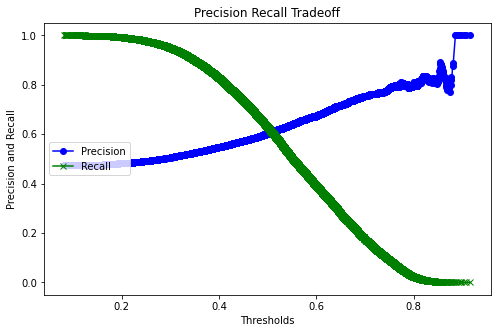

In [152]:
from sklearn.metrics import precision_recall_curve
plt.figure(figsize = (8, 5))
prec, rec, thresh = precision_recall_curve(y_test, y_test_prob)
plt.plot(thresh, prec[1:], marker = 'o', c = 'b', label = 'Precision')
plt.plot(thresh, rec[1:], marker = 'x', c = 'g', label = 'Recall')
plt.legend(loc = 'center left')
plt.xlabel("Thresholds")
plt.ylabel('Precision and Recall')
plt.title('Precision Recall Tradeoff')
plt.show()

In [153]:
acc = []
f1 = []
prec = []
rec = []
thresh = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85]
for i in thresh:
    pred = (y_test_prob >= i).astype(bool)
    f1.append(f1_score(y_test, pred))
    acc.append(accuracy_score(y_test, pred))
    prec.append(precision_score(y_test, pred))
    rec.append(recall_score(y_test, pred))
res = pd.DataFrame({"Thresholds" : thresh, "Accuracy" : acc, "F1" : f1, "Precision" : prec, "Recall" : rec})
res

,Thresholds,Accuracy,F1,Precision,Recall
0,0.10,0.475383,0.643902,0.474867,0.999788
1,0.15,0.478807,0.645093,0.476470,0.998444
2,0.20,0.491056,0.649145,0.482312,0.992431
3,0.25,0.509112,0.653840,0.491269,0.977221
4,0.30,0.535054,0.659506,0.505310,0.949137
5,0.35,0.566768,0.663118,0.525369,0.898769
6,0.40,0.594758,0.659735,0.548265,0.828098
7,0.45,0.614928,0.644371,0.573422,0.735357
8,0.50,0.627983,0.616024,0.603543,0.629032
9,0.55,0.629560,0.563336,0.639024,0.503679


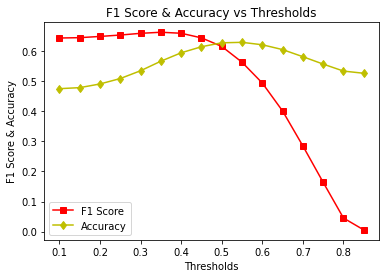

In [154]:
plt.plot(thresh, f1, marker = 's', c = 'r', label = 'F1 Score')
plt.plot(thresh, acc, marker = 'd', c = 'y', label = 'Accuracy')
plt.xlabel('Thresholds')
plt.ylabel('F1 Score & Accuracy')
plt.title('F1 Score & Accuracy vs Thresholds')
plt.legend(loc = 'best')
plt.show()

Best Threshold=0.501893, G-Mean=0.629


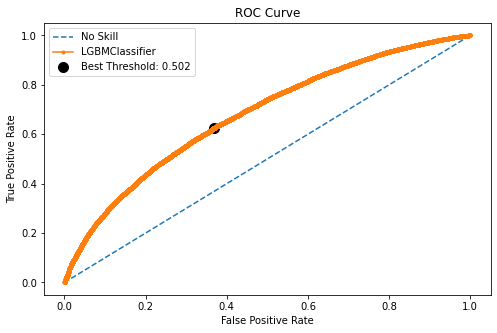

In [155]:
from sklearn.metrics import roc_curve
plt.figure(figsize = (8, 5))
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='LGBMClassifier')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', alpha = 1, edgecolors = 'k', s = 100,
            label='Best Threshold: '+str(round(thresholds[ix], 3)))
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.legend(loc = 'best')
# show the plot
plt.show()

In [ ]:
# default threshold

In [156]:
y_train_pred = (y_train_prob >= 0.502).astype(bool)
y_test_pred = (y_test_prob >= 0.502).astype(bool)
print("Train Accuracy Score:", accuracy_score(y_train, y_train_pred))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred), '\n')
print("Train ClassificationReport :\n",classification_report(y_train, y_train_pred),'\n')
print("Train F1 Score:", f1_score(y_train, y_train_pred))
print("Train Precision Score:", precision_score(y_train, y_train_pred))
print("Train Recall Score:", recall_score(y_train, y_train_pred))
print("Train ROC_AUC Score:", roc_auc_score(y_train, y_train_prob))
print()
print("Test Accuracy Score:", accuracy_score(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred), '\n')
print("Test ClassificationReport :\n",classification_report(y_test, y_test_pred),'\n')
print("Test F1 Score:", f1_score(y_test, y_test_pred))
print("Test Precision Score:", precision_score(y_test, y_test_pred))
print("Test Recall Score:", recall_score(y_test, y_test_pred))
print("Test ROC_AUC Score:", roc_auc_score(y_test, y_test_prob))

Train Accuracy Score: 0.6584011736616517
Train Confusion Matrix:
 [[24541 12312]
 [11438 21235]] 

Train ClassificationReport :
               precision    recall  f1-score   support

           0       0.68      0.67      0.67     36853
           1       0.63      0.65      0.64     32673

    accuracy                           0.66     69526
   macro avg       0.66      0.66      0.66     69526
weighted avg       0.66      0.66      0.66     69526
 

Train F1 Score: 0.6413470250679554
Train Precision Score: 0.6329925179598772
Train Recall Score: 0.6499250145379978
Train ROC_AUC Score: 0.7190456851401197

Test Accuracy Score: 0.6286203309057958
Test Confusion Matrix:
 [[9907 5754]
 [5312 8824]] 

Test ClassificationReport :
               precision    recall  f1-score   support

           0       0.65      0.63      0.64     15661
           1       0.61      0.62      0.61     14136

    accuracy                           0.63     29797
   macro avg       0.63      0.63      0.63  

In [ ]:
# with select threshold on business aspects.

In [157]:
y_train_pred = (y_train_prob >= 0.45).astype(bool)
y_test_pred = (y_test_prob >= 0.45).astype(bool)
print("Train Accuracy Score:", accuracy_score(y_train, y_train_pred))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred), '\n')
print("Train ClassificationReport :\n",classification_report(y_train, y_train_pred),'\n')
print("Train F1 Score:", f1_score(y_train, y_train_pred))
print("Train Precision Score:", precision_score(y_train, y_train_pred))
print("Train Recall Score:", recall_score(y_train, y_train_pred))
print("Train ROC_AUC Score:", roc_auc_score(y_train, y_train_prob))
print()
print("Test Accuracy Score:", accuracy_score(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred), '\n')
print("Test ClassificationReport :\n",classification_report(y_test, y_test_pred),'\n')
print("Test F1 Score:", f1_score(y_test, y_test_pred))
print("Test Precision Score:", precision_score(y_test, y_test_pred))
print("Test Recall Score:", recall_score(y_test, y_test_pred))
print("Test ROC_AUC Score:", roc_auc_score(y_test, y_test_prob))

Train Accuracy Score: 0.6448522854759371
Train Confusion Matrix:
 [[19909 16944]
 [ 7748 24925]] 

Train ClassificationReport :
               precision    recall  f1-score   support

           0       0.72      0.54      0.62     36853
           1       0.60      0.76      0.67     32673

    accuracy                           0.64     69526
   macro avg       0.66      0.65      0.64     69526
weighted avg       0.66      0.64      0.64     69526
 

Train F1 Score: 0.6687505030720935
Train Precision Score: 0.5953091786285796
Train Recall Score: 0.762862302206715
Train ROC_AUC Score: 0.7190456851401197

Test Accuracy Score: 0.614927677282948
Test Confusion Matrix:
 [[ 7928  7733]
 [ 3741 10395]] 

Test ClassificationReport :
               precision    recall  f1-score   support

           0       0.68      0.51      0.58     15661
           1       0.57      0.74      0.64     14136

    accuracy                           0.61     29797
   macro avg       0.63      0.62      0.61

In [158]:
pip install shap

  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sphinx 4.0.1 requires MarkupSafe<2.0, but you have markupsafe 2.0.1 which is incompatible.


In [160]:
import shap
explainer = shap.TreeExplainer(lgb, data=X_train)
shap_values = explainer.shap_values(X_test)
pd.DataFrame(shap_values).head()

 99%|===================| 29523/29797 [01:43<00:00]        

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.023034,0.0,0.007696,-0.020103,0.008510,0.004035,-0.007360,-0.000479,0.0,0.000178,...,-0.001173,0.000275,0.004015,0.000198,0.034574,-0.001528,0.000338,-0.200054,0.0,-0.007807
1,0.067850,0.0,0.004843,-0.029955,0.013307,0.005459,-0.007360,0.001206,0.0,-0.000226,...,-0.000112,-0.007284,0.003051,0.000807,0.026368,0.003766,-0.002644,0.041390,0.0,0.072152
2,0.064852,0.0,0.007327,-0.098108,0.013221,0.002154,-0.007360,0.002316,0.0,0.001485,...,-0.000245,-0.000069,0.002489,0.004910,0.021914,0.009236,0.000712,0.041610,0.0,0.010830
3,0.003471,0.0,-0.047270,-0.028075,0.008640,0.000123,-0.007360,-0.000093,0.0,0.000178,...,-0.001173,0.000167,0.005778,-0.000051,0.026045,-0.011185,-0.000789,-0.175499,0.0,-0.007807
4,-0.074323,0.0,-0.003140,0.002221,0.064177,0.001932,-0.003507,0.000920,0.0,0.000149,...,-0.000245,0.000111,0.005098,0.004803,-0.206384,0.004335,0.002769,0.086433,0.0,0.010469


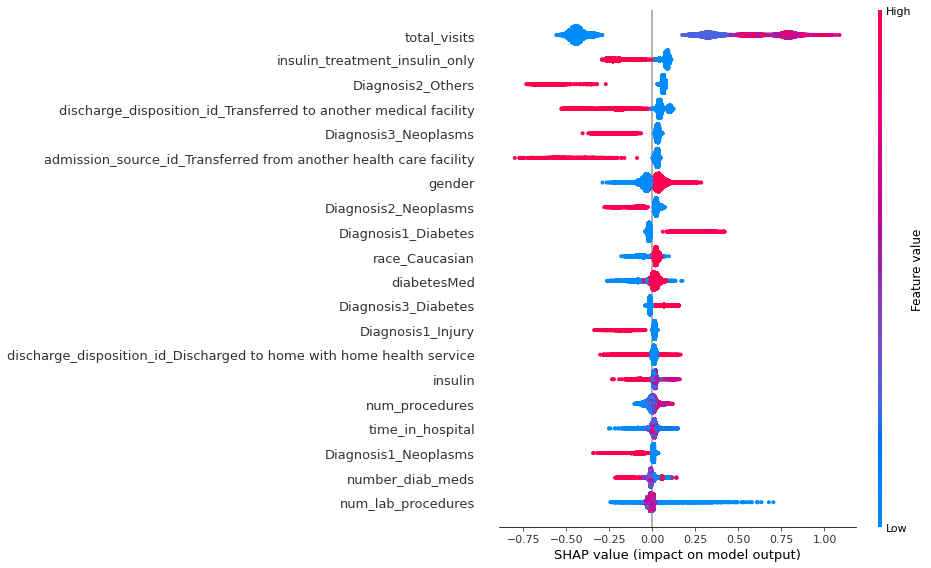

In [161]:
shap.summary_plot(shap_values, X_test)

In [172]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': rf.feature_importances_})


In [173]:
important_features = important_features.sort_values('Importance', ascending = False)


In [178]:
a = important_features.head(15)
a

,Features,Importance
3,num_lab_procedures,0.107316
14,total_visits,0.096450
5,num_medications,0.090623
2,time_in_hospital,0.061669
1,age,0.054557
6,number_diagnoses,0.051162
4,num_procedures,0.041556
11,insulin,0.021212
15,number_diab_meds,0.019306
0,gender,0.018028


<AxesSubplot:xlabel='Importance', ylabel='Features'>

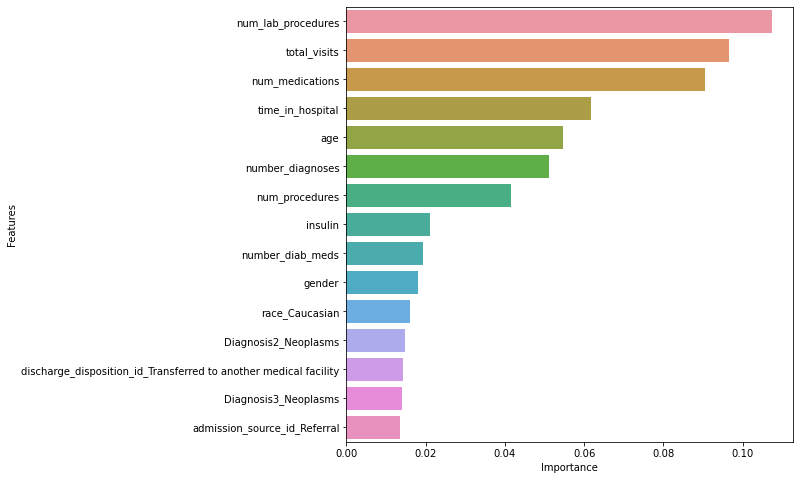

In [181]:
plt.rcParams['figure.figsize'] = [8,8]
sns.barplot(x = 'Importance', y = 'Features', data = a)